In [55]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [10]:
big_data = pd.read_csv("Medicare_Provider_Util_Payment_PUF_CY2018.txt",delimiter = "\t").iloc[1:] ##import data, exempt 1st row
print(len(big_data.nppes_provider_country)) ##number of rows in set

/Users/brentasticc/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#print(big_data.head())

In [13]:
us = big_data[(big_data.nppes_provider_country == "US")] ##filter for just USA

In [15]:
il = us[(us.nppes_provider_state == "IL")] ##filter for just Illinois


404554


In [22]:
print(len(il.nppes_provider_city.unique()))  ##number of different cities represented in IL
print(len(il.nppes_provider_zip.unique()))   ##number of different zip codes represented in IL

782


In [51]:
il.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
count,4.045540e+05,4.045540e+05,404554.000000,404554.000000,404554.000000,404554.000000,404554.000000,404554.000000
mean,1.497201e+09,2.454776e+02,84.482643,137.702702,102.282519,393.985725,78.252938,76.868659
std,2.877642e+08,4.524965e+03,881.161796,1408.710779,251.373917,1105.750344,195.802454,194.573909
min,1.003000e+09,1.100000e+01,11.000000,11.000000,0.010000,0.010000,0.000000,0.007143
25%,1.245329e+09,2.100000e+01,17.000000,20.000000,25.100000,75.000000,20.330000,20.443164
50%,1.497734e+09,4.400000e+01,32.000000,42.000000,69.620000,166.731183,50.519379,49.823678
75%,1.740485e+09,1.230000e+02,75.000000,111.000000,114.960000,323.000000,87.235860,85.230000
max,1.992996e+09,1.803089e+06,250713.000000,391474.000000,41510.555349,98000.000000,32544.273023,32544.276395


(array([5.7170e+03, 9.9230e+03, 5.7830e+03, 1.4757e+04, 1.1485e+04,
        9.7040e+03, 8.2530e+03, 6.1900e+03, 6.3410e+03, 8.6680e+03,
        1.1378e+04, 1.3310e+04, 6.9330e+03, 5.7750e+03, 6.1080e+03,
        6.3680e+03, 6.8890e+03, 7.2410e+03, 6.0430e+03, 4.3990e+03,
        4.2450e+03, 4.7300e+03, 5.0120e+03, 4.6560e+03, 5.0930e+03,
        5.1830e+03, 6.2440e+03, 5.6440e+03, 7.0890e+03, 6.6090e+03,
        5.8100e+03, 7.5500e+03, 6.2910e+03, 7.3020e+03, 6.0160e+03,
        3.8360e+03, 4.3450e+03, 3.8450e+03, 4.0870e+03, 3.8410e+03,
        3.7490e+03, 4.0650e+03, 3.9350e+03, 3.7120e+03, 4.1820e+03,
        4.1970e+03, 4.2250e+03, 4.1930e+03, 5.6900e+03, 3.2840e+03,
        2.9400e+03, 2.2850e+03, 2.0440e+03, 2.1400e+03, 1.8370e+03,
        1.9370e+03, 1.8980e+03, 2.1550e+03, 3.2370e+03, 2.2750e+03,
        2.0340e+03, 2.0040e+03, 2.3820e+03, 2.2010e+03, 2.1590e+03,
        1.5040e+03, 1.1920e+03, 2.5280e+03, 9.6400e+02, 1.0980e+03,
        1.1350e+03, 1.0620e+03, 1.0270e+03, 1.06

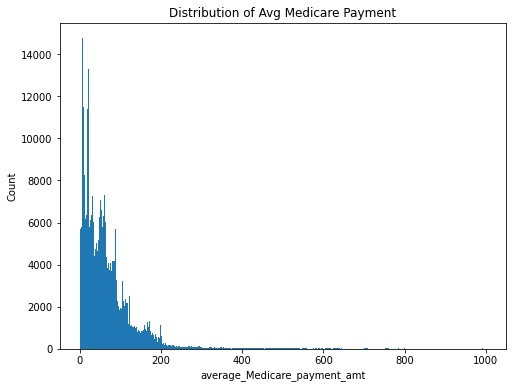

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('average_Medicare_payment_amt')
ax.set_ylabel('Count')
ax.set_title('Distribution of Avg Medicare Payment')
plt.hist(il.average_Medicare_payment_amt, bins='auto',range=(0,1000))

(array([ 4050.,  4813.,  5839.,  9049., 11865.,  8990., 10199., 10370.,
        12015.,  8763.,  6793.,  7023., 11149.,  6581.,  7155.,  7078.,
         7671.,  5866.,  5658.,  6738.,  7605.,  5805.,  6184.,  5791.,
         8432.,  6670.,  4636.,  4764.,  7233.,  4384.,  4180.,  5318.,
         7142.,  5169.,  4464.,  4986.,  5251.,  4746.,  3611.,  3195.,
         4980.,  2981.,  2996.,  2678.,  2885.,  2887.,  2501.,  2689.,
         3968.,  2263.,  2579.,  2571.,  2588.,  2010.,  2030.,  1616.,
         2719.,  1740.,  1328.,  1455.,  1546.,  1635.,  1076.,  1115.,
         1882.,  1143.,  1178.,   981.,   929.,  1597.,   947.,  1097.,
         1400.,   893.,  1009.,   885.,   900.,   629.,   926.,   938.,
         1379.,   747.,   594.,   577.,   683.,   699.,   694.,   552.,
          684.,   515.,   518.,   337.,   339.,   543.,   670.,   518.,
          955.,   497.,   566.,   428.,   482.,   427.,   352.,   490.,
          711.,   398.,   392.,   395.,   471.,   448.,   427., 

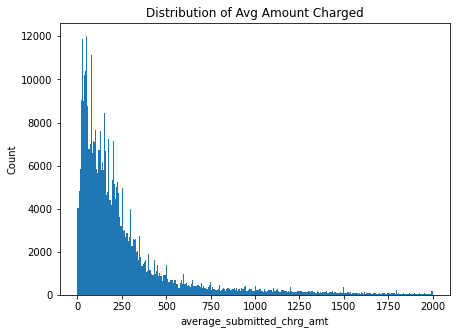

In [79]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlabel('average_submitted_chrg_amt')
ax.set_ylabel('Count')
ax.set_title('Distribution of Avg Amount Charged')
plt.hist(il.average_submitted_chrg_amt, bins='auto',range=(0,2000))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.9339e+04, 3.2856e+04, 1.4064e+04,
        2.4462e+04, 1.0738e+04, 1.9673e+04, 8.8320e+03, 1.5599e+04,
        7.1880e+03, 1.3099e+04, 5.9510e+03, 1.1275e+04, 5.2050e+03,
        9.6850e+03, 4.4900e+03, 8.4910e+03, 3.9870e+03, 7.7100e+03,
        3.5210e+03, 6.5290e+03, 3.1520e+03, 6.0510e+03, 2.8470e+03,
        5.4390e+03, 2.6480e+03, 4.9710e+03, 2.4270e+03, 4.6070e+03,
        2.1560e+03, 4.3260e+03, 2.0760e+03, 3.9040e+03, 1.9060e+03,
        3.5840e+03, 1.7530e+03, 3.3450e+03, 1.6060e+03, 3.1140e+03,
        1.5790e+03, 2.8450e+03, 1.3890e+03, 2.6640e+03, 1.3140e+03,
        2.6170e+03, 1.2030e+03, 2.3650e+03, 1.2210e+03, 2.2920e+03,
        1.1470e+03, 2.1170e+03, 1.0370e+03, 2.0090e+03, 9.4100e+02,
        1.9530e+03, 8.9700e+02, 1.8050e+03, 8.1300e+02, 1.7280e+03,
        8.3800e+02, 8.0900e+02, 1.6170e+03, 7.8300e+02, 1.5230e+03,
        7.6600e+02, 1.4610e+03, 7.3000e+02, 1.44

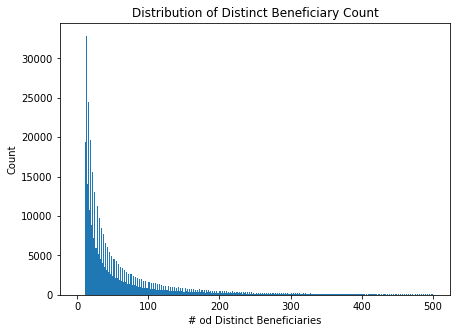

In [27]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlabel('# of Distinct Beneficiaries')
ax.set_ylabel('Count')
ax.set_title('Distribution of Distinct Beneficiary Count')
plt.hist(il.bene_unique_cnt, bins='auto',range=(0,500))

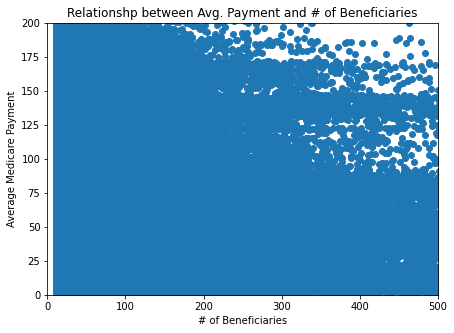

In [42]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.xlim(0,500)
plt.ylim(0,200)
ax.set_xlabel('# of Beneficiaries')
ax.set_ylabel('Average Medicare Payment')
ax.set_title('Relationshp between Avg. Payment and # of Beneficiaries')
ax.scatter(il.bene_unique_cnt,il.average_Medicare_payment_amt)

(array([1.9339e+04, 0.0000e+00, 1.7368e+04, 0.0000e+00, 1.5488e+04,
        0.0000e+00, 1.4064e+04, 1.2797e+04, 0.0000e+00, 1.1665e+04,
        1.0738e+04, 0.0000e+00, 1.0219e+04, 9.4540e+03, 8.8320e+03,
        0.0000e+00, 8.0920e+03, 7.5070e+03, 7.1880e+03, 6.7880e+03,
        6.3110e+03, 5.9510e+03, 5.7360e+03, 5.5390e+03, 1.0190e+04,
        4.7000e+03, 4.4900e+03, 4.3650e+03, 8.1130e+03, 3.9600e+03,
        7.2710e+03, 3.2780e+03, 6.4030e+03, 6.0510e+03, 2.8470e+03,
        5.4390e+03, 5.2190e+03, 4.8270e+03, 4.6070e+03, 4.3870e+03,
        6.1470e+03, 3.8340e+03, 3.5840e+03, 5.0980e+03, 3.1680e+03,
        4.5510e+03, 4.1530e+03, 3.9520e+03, 3.7000e+03, 3.5670e+03,
        4.3820e+03, 3.0460e+03, 3.7910e+03, 3.4930e+03, 3.3270e+03,
        3.0960e+03, 2.9570e+03, 2.8090e+03, 3.2410e+03, 3.0190e+03,
        2.7900e+03, 2.6070e+03, 2.4370e+03, 2.7850e+03, 2.6250e+03,
        2.3890e+03, 2.1670e+03, 2.3640e+03, 2.2560e+03, 2.0830e+03,
        2.2150e+03, 1.7760e+03, 1.8140e+03, 1.93

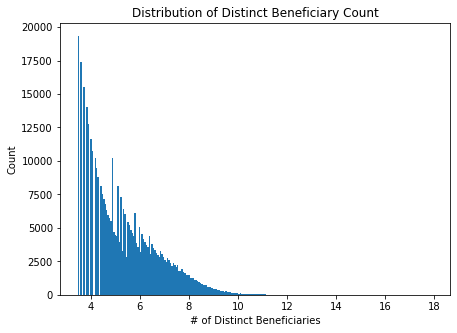

In [50]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlabel('# of Distinct Beneficiaries')
ax.set_ylabel('Count')
ax.set_title('Distribution of Distinct Beneficiary Count')
plt.hist(np.log2(il.bene_unique_cnt), bins='auto')

(array([2.0300e+02, 2.0600e+02, 1.1590e+03, 7.6000e+01, 6.2000e+01,
        1.0200e+02, 1.0800e+02, 4.5000e+01, 1.0300e+02, 4.8800e+02,
        1.6700e+02, 3.0000e+01, 6.9000e+01, 4.4000e+01, 6.5000e+01,
        9.0000e+01, 5.6000e+01, 1.2300e+02, 9.7000e+01, 1.8400e+02,
        2.2300e+02, 4.5900e+02, 7.9800e+02, 3.7900e+02, 1.5200e+02,
        1.7800e+02, 7.0000e+01, 1.1400e+02, 7.2000e+01, 2.9000e+01,
        2.9000e+01, 8.5000e+01, 4.0700e+02, 2.8300e+02, 1.8450e+03,
        4.5310e+03, 1.7700e+02, 7.9900e+02, 1.4380e+03, 1.4200e+02,
        2.9300e+02, 7.3000e+02, 3.1600e+02, 4.4200e+02, 4.0500e+02,
        1.9830e+03, 4.9800e+02, 7.6200e+02, 8.7900e+02, 1.3810e+03,
        1.3830e+03, 2.6500e+03, 2.4370e+03, 3.1530e+03, 3.4690e+03,
        2.7080e+03, 2.4150e+03, 1.8790e+03, 1.9180e+03, 2.1010e+03,
        1.7590e+03, 2.4830e+03, 2.2880e+03, 2.4620e+03, 2.3280e+03,
        1.7770e+03, 3.0300e+03, 1.8380e+03, 2.4270e+03, 1.5280e+03,
        1.7350e+03, 1.9800e+03, 1.8440e+03, 1.91

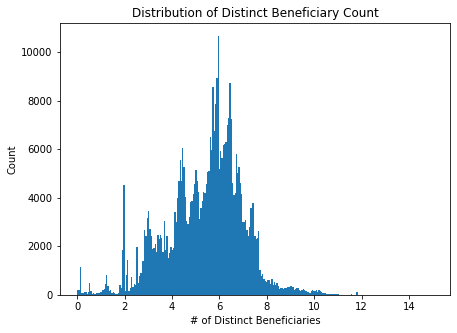

In [48]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlabel('# of Distinct Beneficiaries')
ax.set_ylabel('Count')
ax.set_title('Distribution of Distinct Beneficiary Count')
plt.hist(np.log2(il.average_Medicare_payment_amt+1), bins='auto')

12          229.0
13         3123.0
14          255.0
15           74.0
16          118.0
            ...  
9961462      21.0
9961463      14.0
9961464      12.0
9961465      18.0
9961466      82.0
Name: bene_unique_cnt, Length: 404554, dtype: float64

In [107]:
##create frames for clustering, remove outliers
il_cluster = il[["bene_unique_cnt","average_submitted_chrg_amt"]]
il_cluster = il_cluster[(il_cluster.bene_unique_cnt <= np.mean(il_cluster.bene_unique_cnt)+(2*np.std(il_cluster.bene_unique_cnt)))]
il_cluster = il_cluster[(il_cluster.average_submitted_chrg_amt <=np.mean(il_cluster.average_submitted_chrg_amt)+(2*np.std(il_cluster.average_submitted_chrg_amt)))]
il_cluster.bene_unique_cnt = il_cluster.bene_unique_cnt + 1
il_cluster.average_submitted_chrg_amt = il_cluster.average_submitted_chrg_amt + 1

In [108]:
scaler = preprocessing.StandardScaler().fit(il_cluster)
ilNorm = scaler.transform(il_cluster)

In [109]:
maxClusters = 15
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(ilNorm)
    sse.append(kmeans.inertia_)

In [111]:
print(sse)

[510449.5552135208, 281962.99636889994, 203484.4651243761, 151951.6939226736, 120740.64323800248, 96467.73781608882, 81424.029956355, 70233.23438819459, 62209.13830426972, 56193.87606745972, 51168.999875926274, 46486.10671252256, 42921.8987112508]


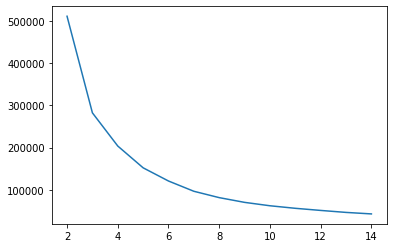

In [112]:
plt.plot(range(2,maxClusters),sse)

In [113]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(ilNorm)

In [114]:
data = pd.concat([il_cluster,pd.DataFrame(kmeans.labels_,columns=["Cluster"])],axis=1)

In [92]:
data.head(20)

,bene_unique_cnt,average_submitted_chrg_amt,Cluster
0,NaN,NaN,1.0
1,NaN,NaN,1.0
2,NaN,NaN,1.0
3,NaN,NaN,1.0
4,NaN,NaN,1.0
5,NaN,NaN,1.0
6,NaN,NaN,1.0
7,NaN,NaN,1.0
8,NaN,NaN,1.0
9,NaN,NaN,1.0


In [115]:
data['Cluster'].value_counts()

0.0    287124
1.0     48712
4.0     38670
3.0     16883
2.0      4365
Name: Cluster, dtype: int64

In [117]:
data[(data['Cluster'] == 0) | (data['Cluster'] == 1) | (data['Cluster'] == 2)| 
     (data['Cluster'] == 3)| (data['Cluster'] == 4)| (data['Cluster'] == 5) |
     (data['Cluster'] == 6)].groupby('Cluster').mean()

,bene_unique_cnt,average_submitted_chrg_amt
Cluster,,
0.0,73.721724,279.223905
1.0,74.110647,307.585229
2.0,77.112745,261.075728
3.0,66.260997,288.345827
4.0,73.187378,275.104137


In [110]:
np.mean(il_cluster.bene_unique_cnt)+(2*np.std(il_cluster.bene_unique_cnt))

310.7637132548417